In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import seaborn as sns

#Set Seed
rd.seed(1930)

In [18]:
#Import CSV and Create Ticker List
SP500 = pd.read_csv('Resources/companylistsp500.csv')
#nasdaq = pd.read_csv('Resources/NASDAQ.txt')
tickers = list(SP500['Symbol'])
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK-A',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP',

In [20]:
def sp500_returns(symbols,period = '5y'):
    tickers_profit = []
    for x in symbols:
        ticker = yf.Ticker(x)
        hist = ticker.history(period=period).dropna()
        profit = (hist.loc[hist.index[len(hist)-1], 'Close']/hist.loc[hist.index[0], 'Close'])-1
        tickers_profit.append(profit)
    sp5y = pd.DataFrame()
    sp5y['Ticker'] = list(symbols)
    sp5y['5yr Return'] = tickers_profit
    

    return sp5y

tickersDF = sp500_returns(period = '5y',symbols=tickers)
tickersDF

,Ticker,5yr Return
0,MMM,0.198781
1,ABT,1.244342
2,ABBV,0.696997
3,ABMD,2.360899
4,ACN,1.434533
...,...,...
499,YUM,0.579039
500,ZBRA,1.772243
501,ZBH,0.369721
502,ZION,0.166902


In [21]:
#generate random portfolios with nmonkeys number of portfolios and nstocks number of stocks

def dart_monkeys(symbols,nmonkeys = 10,nstocks = 30):
    #set random weights for each stock in monkey portfolio
    weights = []
    for i in range(nmonkeys):
        randomlist = rd.sample(range(1, 99), nstocks)
        dby = sum(randomlist)
        rws = []
        for x in randomlist:
            rw = x/dby
            rws.append(rw)
        weights.append(rws)
    #Select random stocks for each stock in monkey portfolio
    stocks = []
    for stock in range(nmonkeys):
        randomS = rd.sample(symbols, nstocks)
        stocks.append(randomS)
    out = []
    #Generate DICT list with random stocks and weights
    for i in range (nmonkeys):
        d = dict(zip(stocks[i],weights[i]))
        out.append(d)
    
    return out


In [22]:
changos = dart_monkeys(nmonkeys = 1000,nstocks = 30,symbols = tickers)
changos

[{'RTX': 0.02073578595317726,
  'AFL': 0.03411371237458194,
  'CTVA': 0.018060200668896322,
  'ARE': 0.05618729096989967,
  'CMG': 0.002006688963210702,
  'MDLZ': 0.05284280936454849,
  'LMT': 0.036120401337792644,
  'WMB': 0.06354515050167224,
  'MXIM': 0.010702341137123745,
  'FLS': 0.03745819397993311,
  'VRTX': 0.043478260869565216,
  'FMC': 0.024080267558528427,
  'BIO': 0.05953177257525084,
  'AAL': 0.06488294314381271,
  'ATVI': 0.0006688963210702341,
  'KMB': 0.024749163879598662,
  'PEG': 0.031438127090301006,
  'AMAT': 0.05351170568561873,
  'WST': 0.03545150501672241,
  'SNA': 0.04882943143812709,
  'LEG': 0.03812709030100334,
  'UHS': 0.044816053511705686,
  'ULTA': 0.028093645484949834,
  'ZION': 0.0013377926421404682,
  'CTXS': 0.012709030100334449,
  'HSY': 0.06153846153846154,
  'NRG': 0.025418060200668897,
  'NOV': 0.007357859531772575,
  'CFG': 0.01471571906354515,
  'JPM': 0.04749163879598662},
 {'BIIB': 0.02002503128911139,
  'OKE': 0.05444305381727159,
  'CAH': 0.0

In [40]:
#definir en documentación estructura de DF
def monkey_returns(DF,diclist):
    returns = []
    for x in diclist:
        #Obtaining Weights
        suma = 0
        for y in x.keys():
            #Sum 
            suma += float(DF[DF['Ticker'] == y]['5yr Return']) * x[y]
        suma = suma/len(x.keys())
        returns.append(suma)

    return returns


In [41]:
changosr = monkey_returns(tickersDF,changos)
annualizedr = []
for x in changosr:    
    a = x/5
    annualizedr.append(a)

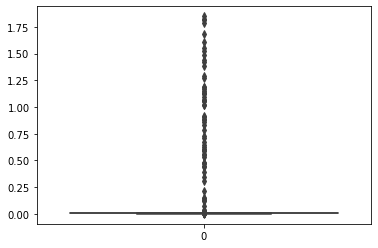

In [42]:
sns.boxplot(data = annualizedr)

In [45]:
annualizedr

[0.005016264063751236,
 0.009649439255082184,
 0.006783501469792887,
 0.004759305302122739,
 0.002001068219647158,
 0.022093863795892534,
 1.095946868082385,
 0.004731012447824547,
 0.0030587829350868447,
 0.0037383320914669816,
 0.004310636590417047,
 0.004599303848516261,
 0.005634604231121904,
 0.007559485429914287,
 0.005441378565001105,
 0.005238362289265187,
 0.006004263826642599,
 0.3437509644957827,
 0.44523197262043646,
 0.0056916320163043245,
 0.0021769106522646136,
 0.0049272948834467485,
 0.015258647081109647,
 0.003975802982452351,
 0.003191970390048103,
 0.003857765622477972,
 0.005094391807004958,
 0.003588608577263249,
 0.005076859116959699,
 0.015645217078984735,
 0.006508032581446356,
 0.004590945344105126,
 0.004306819029538229,
 0.00501237632813452,
 0.0068143365910809895,
 0.004578813672770401,
 0.006059183940036421,
 0.01526846333524651,
 0.004675032056393072,
 0.00241500224924825,
 0.006922203798885779,
 0.004469882294302859,
 0.003001420524264078,
 0.00376361640

In [43]:
seriesr = pd.Series(annualizedr) 

In [44]:
seriesr.describe()

count    1000.000000
mean        0.060055
std         0.244188
min        -0.000113
25%         0.004287
50%         0.005392
75%         0.006917
max         1.849467
dtype: float64